In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [80]:
# 데이터 불러오기
df = pd.read_csv('study_performance.csv')
df 

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [81]:
# 데이터 프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [82]:
# 데이터 결측치 확인
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### 1. race_ethnicity의 분포 확인

In [83]:
# 코드 작성
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

### 2. 데이터 컬럼명 바꾸기
- math_score -> math
- reading_score -> reading
- writing_score -> writing
- rename() 사용

In [84]:
# 코드 작성
df.rename(columns = {'math_score':'math', 'reading_score':'reading', 'writing_score':'writing'},
         inplace=True)

In [85]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### 3. parental_level_of_education 칼럼 삭제하기
- drop() 사용
- axis=0 : 행 방향, axis=1 : 열 방향

In [86]:
# 코드 작성
df.drop('parental_level_of_education', axis=1, inplace=True)

In [87]:
df

,gender,race_ethnicity,lunch,test_preparation_course,math,reading,writing
0,female,group B,standard,none,72,72,74
1,female,group C,standard,completed,69,90,88
2,female,group B,standard,none,90,95,93
3,male,group A,free/reduced,none,47,57,44
4,male,group C,standard,none,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,standard,completed,88,99,95
996,male,group C,free/reduced,none,62,55,55
997,female,group C,free/reduced,completed,59,71,65
998,female,group D,standard,completed,68,78,77


### 4-1. test_preparation_course의 none -> 0, completed -> 1로 바꾸기
- str.replace() 사용
- str.replace('a','b') : 'a' 값을 'b' 값으로 대체

In [88]:
# 코드 작성
df['test_preparation_course']=df['test_preparation_course'].str.replace('none','0')
df['test_preparation_course']=df['test_preparation_course'].str.replace('completed','1')

In [89]:
df

,gender,race_ethnicity,lunch,test_preparation_course,math,reading,writing
0,female,group B,standard,0,72,72,74
1,female,group C,standard,1,69,90,88
2,female,group B,standard,0,90,95,93
3,male,group A,free/reduced,0,47,57,44
4,male,group C,standard,0,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,standard,1,88,99,95
996,male,group C,free/reduced,0,62,55,55
997,female,group C,free/reduced,1,59,71,65
998,female,group D,standard,1,68,78,77


### 4-2. lunch의 free/reduced -> 0, standard -> 1로 바꾸기

In [90]:
# 코드 작성
df['lunch']=df['lunch'].str.replace('free/reduced', '0')
df['lunch']=df['lunch'].str.replace('standard','1')

In [91]:
df

,gender,race_ethnicity,lunch,test_preparation_course,math,reading,writing
0,female,group B,1,0,72,72,74
1,female,group C,1,1,69,90,88
2,female,group B,1,0,90,95,93
3,male,group A,0,0,47,57,44
4,male,group C,1,0,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,1,1,88,99,95
996,male,group C,0,0,62,55,55
997,female,group C,0,1,59,71,65
998,female,group D,1,1,68,78,77


### 5. math의 결측치를 평균값으로 대체하기

In [106]:
# 임의로 결측치 만들기
math_indices = np.random.randint(0, 1000, size=10)
df.loc[math_indices, 'math'] = np.nan

# 코드 작성
df.isna().sum()

gender                     1
race_ethnicity             1
lunch                      1
test_preparation_course    1
math                       9
reading                    1
writing                    1
dtype: int64

In [107]:
# 평균값으로 대체하기
# 코드 작성
df['math']=df['math'].fillna(df.math.mean())
df

,gender,race_ethnicity,lunch,test_preparation_course,math,reading,writing
0,female,group B,1,0,72.000000,72.0,74.0
1,female,group C,1,1,69.000000,90.0,88.0
2,female,group B,1,0,90.000000,95.0,93.0
3,male,group A,0,0,66.096567,57.0,44.0
4,male,group C,1,0,66.096567,78.0,75.0
...,...,...,...,...,...,...,...
996,male,group C,0,0,62.000000,55.0,55.0
997,female,group C,0,1,59.000000,71.0,65.0
998,female,group D,1,1,68.000000,78.0,77.0
999,female,group D,0,0,66.096567,86.0,86.0


In [108]:
df.isna().sum()

gender                     1
race_ethnicity             1
lunch                      1
test_preparation_course    1
math                       0
reading                    1
writing                    1
dtype: int64

### 6. 성별에 따른 reading 평균값 계산하기

In [111]:
# 코드 작성
df.groupby('gender')['reading'].mean()

gender
female    72.608108
male      65.473029
Name: reading, dtype: float64

### 7. test_preparation_course별 writing 점수 분포 그래프 그리기

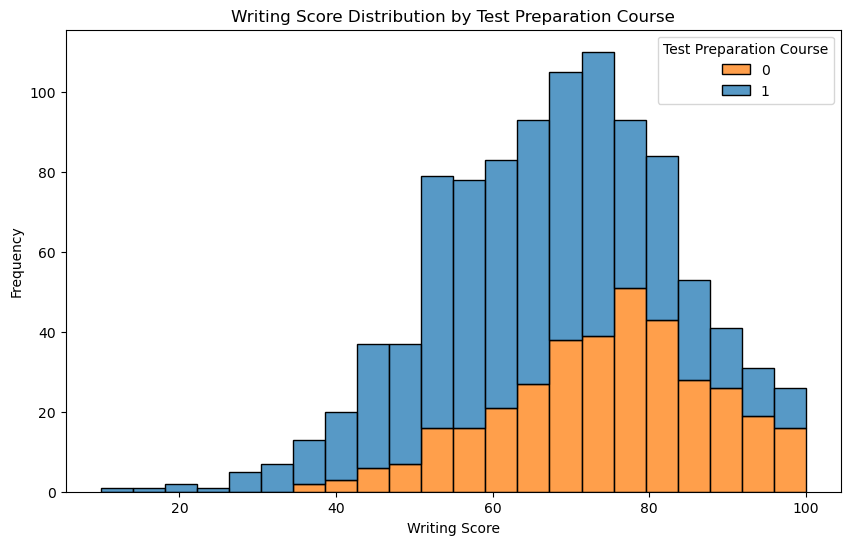

In [115]:
plt.figure(figsize=(10, 6)) #그림(figure) 생성 및 해당 그림 크기 지정
sns.histplot(data=df, x='writing', hue='test_preparation_course',multiple='stack') #multiple='stack' - histogram을 쌓아서 그리라는 의미
plt.title('Writing Score Distribution by Test Preparation Course')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.legend(title='Test Preparation Course', labels=['0', '1']) #범례 추가
plt.show()

### 8-1. math_score, reading_score 관계 산점도로 나타내기 

In [116]:
df = pd.read_csv('study_performance.csv')

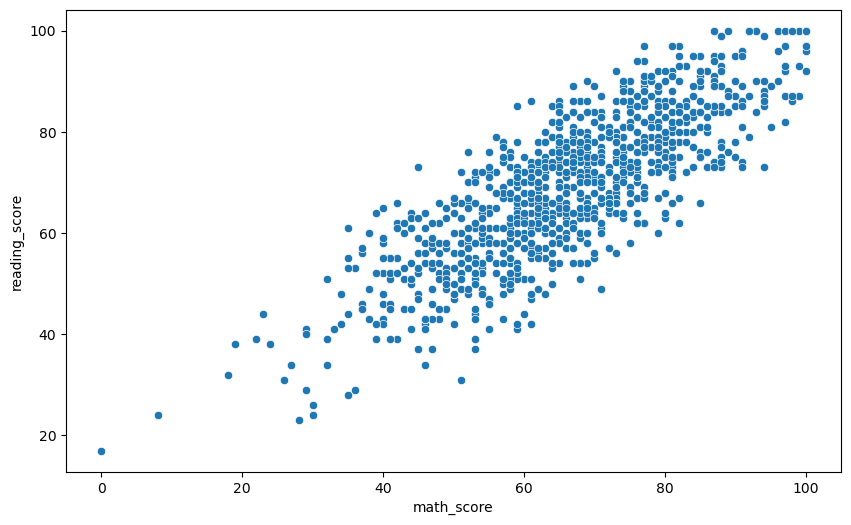

In [118]:
# 코드 작성
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='math_score', y='reading_score')
plt.show()

### 8-2. 위에서 확인한 데이터 구조와 형태 등을 참고하여 8-(1)의 그래프 해석해보기

###<힌트>

D:\Riot Games\League of Legends\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


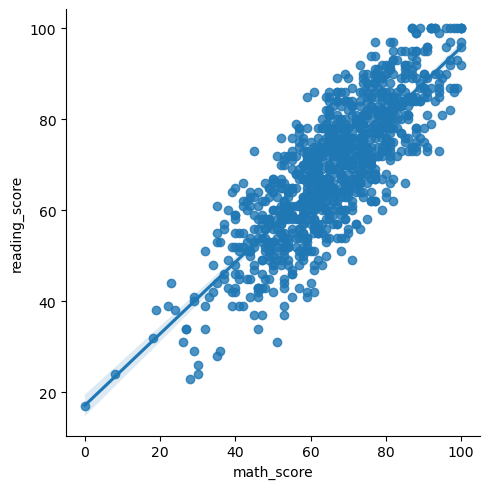

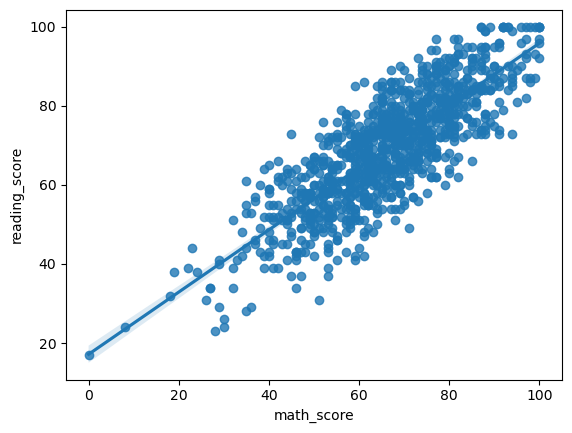

In [122]:
# sns.scatterplot에 회귀선 추가
sns.lmplot(data=df, x='math_score', y='reading_score')
plt.show()
#또 다른 방법
sns.regplot(x='math_score', y='reading_score', data=df, fit_reg=True)
plt.show()

In [31]:
from scipy import stats

# math_score와 reading_score 간의 피어슨 상관계수 계산
correlation, p_value = stats.pearsonr(df['math_score'], df['reading_score'])

# 상관계수 출력
print("피어슨 상관계수:", correlation)

피어슨 상관계수: 0.817579663672054


답 : 상관계수의 값이 클수록 데이터 순위의 일치도는 높아지는데, 피어슨 상관계수가 0.8이라는 것은 양의 상관관계를 가진다.

### 9. 현재 많은 데이터분석과 인공지능 분야에서 널리 사용되는 딥러닝 기법의 장점과 단점에 대해 서술해주세요. (각 2개 이상)

답 :
- 장점
1. 높은 성능과 정확도: 딥러닝은 대규모의 데이터를 활용하여 모델을 학습하므로 복잡한 문제에 대해 뛰어난 성능과 정확도를 보입니다. 특히 이미지, 음성, 텍스트 등 다양한 데이터 유형에 대한 처리에서 우수한 성능을 보이며, 많은 분야에서 기존 방법보다 우수한 결과를 제공합니다.

2. 자동화 및 스케일링: 딥러닝 모델은 데이터를 기반으로 자동으로 특징을 추출하고 학습하기 때문에 사람의 개입이 적게 필요합니다. 또한, 이러한 모델은 대규모 데이터에 대해 효과적으로 확장할 수 있어서, 대규모 시스템에서도 유용하게 사용될 수 있습니다. 

- 단점
1. 대규모 데이터 필요: 딥러닝은 대규모의 데이터를 필요로 하기 때문에 데이터가 부족하거나 품질이 낮을 경우 성능이 저하될 수 있습니다. 데이터 수집 및 준비에 많은 비용과 시간이 소요될 수 있습니다.

2. 높은 계산 비용: 딥러닝 모델을 학습하고 실행하기 위해서는 고성능의 컴퓨팅 자원이 필요합니다. 특히 대규모의 신경망을 학습하는 데에는 많은 양의 연산이 필요하므로, 이에 따른 높은 계산 비용이 발생할 수 있습니다. 이로 인해 하드웨어 및 인프라 구축에 대한 추가 비용이 발생할 수 있습니다. 